**Bocheng Dai, Chen Cao, Yifan Geng**

**bd367687@stanford.edu, chencao@stanford.edu, yifangen@stanford.edu**

# Introduction {-}

Welcome to MS&E 244: Statistical Arbitrage - Homework 4.

This assignment is due by February 18th, 2026 at 11:59pm Pacific Time and should be done in groups. You may use the same group as your course project. We recommend collaborating via a private GitHub repo.

Instructions for this assignment are below. **Please read all instructions carefully.**

1. Replace "Your Name(s) Here" above in bold with your name, and, if working in a group, your group members' names.
2. Read and run the instructions code in the Setup section. Make sure you understand what it does.
3. Answer the questions in the sections below. Make sure to limit code output to a reasonable length so that the resulting PDF you'll make from this notebook is readable. If the resulting PDF is not readable, keep your lines of code less than 80 characters.
4. Once finished, export or convert the notebook to PDF, using any method you like. For example, you can use the File -> Save and Export Notebook As -> PDF option in Jupyter Lab, you can use the [nbconvert](https://nbconvert.readthedocs.io/en/latest/) command line tool, etc. Whatever displays best is fine. Make sure no code is cut off in the PDF and that sheets are 8.5x11 inch dimensions or similar.
5. Submit the resulting PDF to the Gradescope assignment. If working in a group, only one person needs to submit and select all group members on Gradescope.
6. Zip and submit all files (your .ipynb file and any .py files we provided or you created) to the Canvas assignment. If working in a group, only one member of the group needs to submit to Canvas. Unlike Gradescope, no group members need to be selected on Canvas.

# Setup  {-}

**System Requirements**

First, ensure you have the proper system requirements:

1. We will only support Mac or Linux in this course. If you're on Windows, learn to use [WSL 2.0](https://learn.microsoft.com/en-us/windows/wsl/install) to run Linux on Windows, and then run these commands via WSL.
2. Ensure you have Python 3.10 and pip installed. You also need something to run this Jupyter notebook, whether that's Jupyter Notebook, Jupyter Lab, an IDE like VS Code, or Google Colab. We recommend collaborating via GitHub and using Jupyter Lab or VS Code to complete this notebook. 

**Jupyter Lab**

To use Jupyter Lab, we'll need to set up the Python virtual environment and install the requirements. We've provided example instructions for doing so below for those using Jupyter Lab. Note that you may need to substitute `pip` with `pip3` depending on your installation. You can learn more by reading the [venv docs](https://docs.python.org/3/library/venv.html) and the [ipykernel docs](https://ipython.readthedocs.io/en/stable/install/kernel_install.html). See documentation for [Jupyter Lab](https://jupyterlab.readthedocs.io/en/latest/) if needed.

```bash
# Navigate to the root directory containing your course files
cd /path/to/mse244

# Place the requirements.txt file in this directory if it isn't already there
# Put this .ipynb file in this directory or in a subdirectory, e.g. "hw1"

# Create a virtual environment
python3.10 -m venv .venv

# Activate the virtual environment
source .venv/bin/activate

# Install the required packages
pip install -r requirements.txt

# Add the virtual environment to Jupyter
python -m ipykernel install --user --name mse244 --display-name="MSE244"

# Start Jupyter Lab
jupyter lab

# Once in Jupyter, make sure to select the "MSE244" kernel 
```

**VS Code**

If using VS Code, read the docs for [Jupyter notebooks in VS Code](https://code.visualstudio.com/docs/datascience/jupyter-notebooks) and [virtual environments in VS Code](https://code.visualstudio.com/docs/python/environments). VS Code can help you create and activate a virtual environment and Jupyter kernel for this notebook through its GUI (though you should also learn how to do these things via the command line). Make sure that you use Python 3.10 to create your virtual environment.


Once setup is complete and you're running within your environment, you can begin executing the cells below.

# Imports {-}

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
from datetime import datetime
from typing import Any, Dict, Optional, Tuple, Union

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mpl_ticker
import seaborn as sns
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf

# We add any local imports (Python files we've written) here
from hw4 import (
    load_data,
    select_asset_universe,
    estimate_oos_residuals,
    estimate_ou_parameters,
    forecast_residual_returns_ou_signal,
    forecast_returns_noisy_oracle,
    run_portfolio_optimization,
)


# Configure pandas display options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 40)
pd.set_option('display.precision', 4)

# Data {-}

To start with, we'll load the supplied Japanese equity data, preprocess the data, and set up the necessary variables.

Please make sure to look up and learn about any lines you don't understand by reading the [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html). This is essential knowledge for anyone working with financial data in Python.


Price df shape at load: (4235, 226)
Price df shape after slicing time axis: (3936, 226)
Price df shape after removing future asset columns: (3936, 226)

Prices head:


,1332.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1925.T,1928.T,...,9503.T,9531.T,9532.T,9602.T,9613.T,9735.T,9766.T,9843.T,9983.T,9984.T
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-04,514.1772,1640.3337,906.6639,1236.6694,523.9589,456.3690,1560.3464,682.8918,1352.8394,1015.7311,...,2240.7510,2253.5034,1583.7520,1837.3094,946.7017,4466.2446,2745.0986,2307.3474,3180.9983,1098.4468
2007-01-05,535.0902,1598.5864,909.3971,1226.7228,513.8568,450.3043,1542.5345,677.7186,1339.8625,1005.1937,...,2172.8496,2222.2046,1548.7904,1841.5720,956.0132,4409.3506,2601.4155,2232.3472,3203.0117,1120.9558
2007-01-09,524.2733,1614.2418,925.7949,1256.5621,520.5914,460.9175,1538.9718,695.8253,1372.3043,1015.7311,...,2179.6396,2194.3833,1611.7211,1858.6237,977.7407,4508.9165,2586.2905,2214.6997,3167.2395,1114.2031
2007-01-10,506.2446,1581.1916,913.4961,1246.6157,511.8364,466.2240,1535.4095,691.9454,1356.0836,1006.3643,...,2138.8989,2159.6069,1566.2709,1841.5720,957.5651,4430.6855,2510.6685,2342.6404,3101.1982,1118.7048
2007-01-11,504.0811,1589.8885,910.7634,1249.9312,511.8364,479.8697,1567.4717,699.7054,1330.1299,1010.4626,...,2138.8989,2145.6963,1569.7675,1854.3606,945.1494,4380.9028,2525.7932,2347.0520,3057.1704,1118.7048



Metadata head:


Ticker,Industry,Sector,Company
1332.T,Fishery,Consumer Goods,NISSUI.CORP.
1605.T,Mining,Materials,INPEX.CORP.
1721.T,Construction,Capital Goods/Others,COMSYS.HOLDINGS.CORP.
1801.T,Construction,Capital Goods/Others,TAISEI.CORP.
1802.T,Construction,Capital Goods/Others,OBAYASHI.CORP.


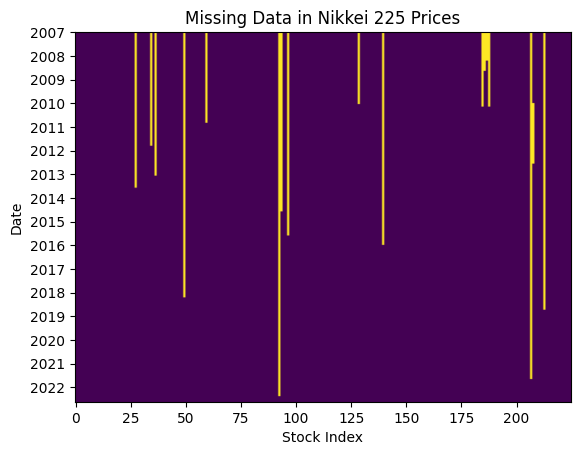

In [3]:
config = {
    'NIKKEI_CSV_PATH': 'N225.csv',
    'END_YEAR': 2022
}

prices, returns, tickers, metadata = load_data(config, verbose=True)

# Outline {-}

In this homework, we'll cover two topics.

First, we'll explore some of the details of the trading strategy proposed in the paper "Statistical Arbitrage in the US Equity Market" by Avellaneda and Lee. The strategy utilizes the Ornstein-Uhlenbeck (OU) process, which is a mean-reverting stochastic process. The authors propose using this process to model the residual returns of a portfolio of stocks, and then using these models to form trading signals.

Second, we'll explore some details of portfolio optimization, and explore how it could be used as an alternative to the strategy proposed in the paper. We'll suppose that we have a forecasting model for the residual returns, and use this model to optimize a portfolio of the residuals. We'll determine how changing the forecasting model's performance changes the performance of the portfolio optimization.

Here's an outline of what you'll do in this homework:

1. Derive the OU process parameter estimators
2. Estimate OU processes and signals from residuals
3. Forecast residual returns using the OU process
4. Derive a noisy oracle forecasting model for the residual returns
5. Optimize a portfolio of residuals using noisy oracle return forecasts and a simple covariance matrix forecast
6. Explore the effect of changing the forecasting model's performance on the portfolio performance

Throughout the homework, feel free to make any modifications to the code or the strategy that you think will improve performance. 

# Ornstein-Uhlenbeck Process Review {-}

## Introduction {-}

Now that we can estimate residuals, it's time to estimate the parameters of a stochastic process which we'll use to model them. This is a useful step because it allows us to utilize a rule for trading the residuals which is based on the properties of the process. In this homework, we'll use the Ornstein-Uhlenbeck (OU) process to model the residuals. The OU process is a mean-reverting stochastic process which is often used in finance to model interest rates, exchange rates, and other quantities that are expected to revert to a long-term mean.

Although empirical studies have shown that the OU process is a good model for many financial time series, it is important to note that the OU process is not a perfect model. In particular, the OU process makes the following assumptions:

1. The residuals are normally distributed.
2. The process parameters (mean reversion speed, mean, and variance) are constant over time.
3. There are no jumps in the residuals.

All of these assumptions are known to be false in practice. Moreover, the parameter estimates for the OU process can be imprecise and biased in finite samples. However, despite these limitations, the OU process is still a useful tool for understanding mean-reverting time series and can sometimes provide a reasonably good set of insights into their behavior.

## Background {-}

To start with, we'll review the definition of the Wiener process $W_t$, which is a continuous-time stochastic process that is often used in the modeling of the behavior of financial time series. The Wiener process is defined by the following properties:

* The process starts at zero: $W_0 = 0$.
* The process has independent increments: for any $0 \leq t_1 < t_2 < \cdots < t_n$, the increments $W_{t_2} - W_{t_1}, W_{t_3} - W_{t_2}, \ldots, W_{t_n} - W_{t_{n-1}}$ are independent random variables.
* The process has stationary increments: for any $0 \leq t_1 < t_2$, the increment $W_{t_2} - W_{t_1}$ is normally distributed with mean 0 and variance $t_2 - t_1$.
* The process has continuous paths: with probability 1, the function $W_t$ is continuous in $t$.

Below we'll define the OU process and derive several properties of it. Important results will be boxed and/or tagged for easy reference.

## Definition {-}

The OU process is defined by the following stochastic differential equation:

$$
d X_{n,t} = -\kappa_n (X_{n,t} - \mu_n) dt + \sigma_n d W_{n,t}.
$$

where $d X_{n,t}$ is the difference, $X_{n,t}$ is the price, $\kappa_n > 0$ is the speed of mean reversion, $\mu_n$ is the long-term mean, $\sigma_n$ is the instantaneous volatility, and $W_{n,t}$ is a Wiener process. The OU process given an initial value $X_0 \sim N(\mu, \sigma^2/2\kappa)$ is stationary and mean-reverting, and it has an equilibrium distribution which is Gaussian. Given a specified initial value $X_0$, the OU process is actually not stationary, but it converges to the stationary distribution as $t \to \infty$.

Although we have written the OU process in a multivariate form, we will only consider the univariate case in this homework. The multivariate case with nontrivial correlation structure is more complex and its study requires a strong background in stochastic processes. So, we'll drop the subscript $n$ and write the OU process as follows from now on:

$$
\boxed{%
d X_t = -\kappa (X_t - \mu) dt + \sigma d W_t.
}
$$

Despite the subscripts vanishing, it's understood that each of the parameters are unique to the process being modeled.

## Solution {-}

The solution of the OU process can be exactly calculated on the interval $[t_0, t_0 + \Delta t]$ as follows, where $X_{t_0}$ is the initial value at time $t_0$.

$$
X_{t_0+\Delta t} = e^{-\kappa\Delta t}\,X_{t_0}
      +(1-e^{-\kappa\Delta t})\mu
      +\sigma\int_{t_0}^{t_0+\Delta t}e^{-\kappa(t_0+\Delta t-s)}\,dW(s),
\tag{S}
$$

**Proof.** The proof of this formula is a standard exercise in stochastic calculus, and it can be found in many textbooks on the subject. However, we'll go through it here to provide some motivation for what follows. Note that this requires some basic stochastic calculus knowledge---if you don't have this, feel free to skip this section. As a summary, first, we'll rewrite the SDE in a more convenient form, then we'll apply an integrating factor to eliminate the drift term, and finally, we'll integrate the resulting equation to reach the solution formula above.

*Step 1: Rewrite the SDE in a more convenient form.* 

First, we'll rewrite the equation by moving the mean $\mu$ onto the left-hand side:

$$
dX_t-\kappa(\mu-X_t)\,dt=\sigma\,dW_t
\quad\Longrightarrow\quad
dX_t+\kappa(X_t-\mu)\,dt=\sigma\,dW_t.
$$

Next we will set the long-run mean $\mu$ to zero. This is commonly done when solving SDEs to simplify the problem. We can do this by defining a new process $Y_t$ as follows:

$$
Y_t := X_t-\mu.
$$

Note that now $dY_t=dX_t$, so

$$
dY_t = -\kappa Y_t\,dt + \sigma\,dW_t \qquad \text{with} \qquad Y_{t_0} = X_{t_0}-\mu .
\tag{1}
$$

You may recognize Equation (1) as a linear SDE with constant coefficients.

*Step 2: Use the integrating factor method and Itô's lemma to get rid of the drift term.*

We'll use the integrating factor method, which is a standard technique for solving linear ordinary differential equations. The idea is to multiply both sides of the equation by a factor which, after the application of Itô's lemma, will eliminate the drift term. Here, the drift term is $-\kappa Y_t\,dt$, so we want to multiply by the integrating factor $e^{\kappa t}$. This will allow us to rewrite the equation in a form that can be integrated directly.

First we'll define the new process with the integrating factor $e^{\kappa t}$ as

$$
Z_t := e^{\kappa t}Y_t.
$$

Itô's lemma (which can be thought of as the stochastic version of the product rule, if you aren't familiar with it) then gives:

$$
dZ_t = \kappa e^{\kappa t}Y_t\,dt + e^{\kappa t}dY_t
      = \kappa e^{\kappa t}Y_t\,dt
        +e^{\kappa t}\!\big(-\kappa Y_t\,dt + \sigma\,dW_t\big)
      = \sigma e^{\kappa t}\,dW_t .
\tag{2}
$$

Notice the drift terms cancel---this is exactly why we chose this integrating factor. Importantly, Equation (2) now has no drift, so we can integrate it directly.

*Step 3: Integrate from $t_0$ to $t_0+\Delta t$ to produce the solution equation.*

Integrating both sides of (2) we get:

$$
\int_{t_0}^{t_0+\Delta t} dZ_t 
= Z_{t_0+\Delta t} - Z_{t_0}
= \sigma \int_{t_0}^{t_0+\Delta t} e^{\kappa s}\,dW_s .
$$

Substituting back $Z = e^{\kappa t}Y$ and $Y = X - \mu$ gives:

$$
e^{\kappa(t_0+\Delta t)}\big( X_{t_0+\Delta t}-\mu \big)
   -e^{\kappa t_0} \big(X_{t_0} - \mu \big)
      =\sigma \int_{t_0}^{t_0+\Delta t} e^{\kappa s}\,dW_s .
$$

Further multiplying by $e^{-\kappa(t_0+\Delta t)}$ we get:

$$
X_{t_0+\Delta t}-\mu
   =e^{-\kappa\Delta t} \big(X_{t_0} - \mu \big)
     + \sigma \int_{t_0}^{t_0+\Delta t} e^{-\kappa(t_0+\Delta t-s)}\,dW_s .
$$

Finally, re-arranging to isolate $X_{t_0+\Delta t}$ yields:

$$
\boxed{%
X_{t_0+\Delta t}
     =e^{-\kappa\Delta t}X_{t_0}
      +(1-e^{-\kappa\Delta t})\mu
      +\sigma\int_{t_0}^{t_0+\Delta t} e^{-\kappa(t_0+\Delta t-s)}\,dW_s }.
$$

This is equation (S), as desired. $\blacksquare$

### Further Details {-}

Let's first recap each of the terms in the solution equation (S):

* $X_{t_0+\Delta t}$: the value of the process at the future time $t_0+\Delta t$.
* $e^{-\kappa\Delta t}X_{t_0}$: the part of today's value that survives after mean-reversion during $\Delta t$.
* $(1-e^{-\kappa\Delta t})\mu$: the pull toward the long-run mean $\mu$.
* The Itô integral: the cumulative shock of the Brownian motion over $[t_0,t_0+\Delta t]$, exponentially discounted the further back in time the shock occurred.

A few useful quantities can be calculated from the solution (S).

**Mean of the process at time $t_0+\Delta t$.** The expectation of the value of the process at the future time $t_0 + \Delta t$ is: 
$$
\boxed{ \mathbb{E}[X_{t_0+\Delta t}] = e^{-\kappa\Delta t}X_{t_0} + \big( 1-e^{-\kappa\Delta t} \big) \mu }.
$$

Note that the expectation of the Itô integral is zero. If you haven't encountered stochastic integrals, or the Itô integral in particular, before, you can think of them as being like the Riemann integral, where the Riemann sums have stochastic increments. In this case, the Itô integral is defined as the limit of a sum of stochastic increments, where the increments are taken at random times. Here those increments have expectation zero, so the expected value of the Itô integral is zero. This means that the expected value of the process at the future time $t_0 + \Delta t$ is simply the deterministic part of the equation, which is the sum of the mean-reversion term and the long-run mean term.

**Variance of the process at time $t_0+\Delta t$.** The variance of this value at this future time can be computed as follows. First, we'll need standard result from stochastic calculus. This result is known as the Itô isometry. It states that that the variance of the Itô integral is equal to the integral of the square of the integrand. The formal statement of the Itô isometry is

$$
\operatorname{Var}\left[ \int_{t_0}^{t_0+\Delta t} f(s)\,dW(s) \right]
= \int_{t_0}^{t_0+\Delta t} f^2(s)\,ds .
$$
for any deterministic function $f(s)$ which is square-integrable. 

We can apply this result to compute the variance of the Itô integral. In our case, we have $f(s) = e^{-\kappa(t_0+\Delta t-s)}$, which can be integrated by parts. The variance of the Itô integral is then given by (notice the square of the integrand):

$$
\int_{t_0}^{t_0+\Delta t} e^{-2\kappa(t_0+\Delta t-s)}\,ds
= \frac{1}{2\kappa} \big( 1-e^{-2\kappa\Delta t} \big) .
$$

The first two terms on the right-hand side of (S) are deterministic given the information set at time $t_0$ and thus have zero variance. Thus the variance of the process at the future time $t_0 + \Delta t$ is given by:

$$
\boxed{ \operatorname{Var}[X_{t_0+\Delta t}]= \frac{\sigma^{2}}{2\kappa} \big( 1-e^{-2\kappa\Delta t} \big) }.
$$

**Equilibrium distribution of the process.** The equilibrium distribution of the OU process is the stationary distribution of the process. We can compute this via methods similar to the mean and variance above. We know that for any $t \geq 0$, starting at time 0,

$$
X_t = e^{-\kappa t}X_0 + (1-e^{-\kappa t})\mu + \sigma\int_{0}^{t}e^{-\kappa(t-s)}\,dW_s.
$$

To get the mean of the distribution, we take expectations and use the fact that $\mathbb{E}\big[\int_0^t \cdots\,dW_s \big] = 0$, then take the limit as $t\to\infty$:

$$
\mathbb{E}[X_t] = e^{-\kappa t}X_0+(1-e^{-\kappa t})\mu \xrightarrow[t\to\infty]{}\, \mu.
$$

To get the variance of the distribution, we use the Itô isometry:

$$
\operatorname{Var}[X_t]
= \sigma^2 \int_{0}^{t}e^{-2\kappa(t-s)}\,ds
= \sigma^2 \int_{0}^{t}e^{-2\kappa u}\,du
= \frac{\sigma^2}{2\kappa} \big(1-e^{-2\kappa t}\big)
\xrightarrow[t\to\infty]{} \,\frac{\sigma^2}{2\kappa}.
$$

Since $X_t$ is a linear combination of the Gaussian $X_0$ and the Itô integral (itself Gaussian), $X_t$ is Gaussian for every $t$. In the limit $t\to\infty$ it therefore converges in law to the Gaussian distribution with mean $\mu$ and variance $\frac{\sigma^2}{2\kappa}$:

$$
\boxed{%
X_\infty \sim N \left( \mu, \frac{\sigma^2}{2\kappa} \right)
}.
$$

We'll denote this equilibrium variance as $\sigma^2_{\text{eq}} := \frac{\sigma^2}{2\kappa}$.

## Estimation {-}

When the OU process is observed at discrete intervals (which is the case when we have aggregated data, such as daily or minutely returns calculated from the closing price of each period), the parameters of the process can be estimated using a regression approach. We won't get into how to derive this result in this class, but we'll give the details here. The first fact is that observing the OU process at $\Delta t$ intervals (where typically e.g. $\Delta t$ is equal to one day or one minute, etc.) yields an AR(1) process, which can be seen from the solution equation above. The second fact is that estimation for an AR(1) process can be performed by regressing consecutive lags of the process on one another. In short, for an AR(1) process $X_t$, the following equation describes the necessary parameters:

$$
\boxed{%
X_{t+1} = a + bX_t + \zeta_{t+1}
}
$$

where $a$ and $b$ are scalars and $\zeta_{t+1}$ is a noise process with mean zero and variance $\sigma_\zeta^2$. Estimation of the parameters in this equation can be performed in any reasonable way, but as mentioned above, a simple lag-1 regression suffices. After performing this regression, some stochastic process estimation theory (which we won't expound upon) tells us that there exist the following equations for the OU process parameters we'll care about:

$$
\boxed{%
\hat\kappa = -\frac{1}{\Delta t}\log(\hat b) 
\qquad \hat\mu = \frac{\hat a}{1-\hat b}  
\qquad \hat\sigma^2 = \frac{\hat\sigma_\zeta^2 \cdot 2\kappa}{1-\hat b^2}
\qquad \hat\sigma^2_{\text{eq}} = \frac{\hat\sigma_\zeta^2}{1-\hat b^2}
}
$$

If you're familiar with the stationary variance of an AR(1) process, you'll note the similarity to $\sigma^2_{\text{eq}}$. Note that these are different from the variance of the next term in the discretized OU process, $X_{t_0 + \Delta t}$, which is given by $\hat\sigma^2_\zeta$. Also note that these are both different from the parameter $\sigma$ for the instantaneous volatility in the OU process definition.

Note that we will drop the hats from the parameters in the rest of this document.

## Simulation {-}

The OU process can be simulated using the exact formulation at discrete intervals which we covered above. However, for background, we'll cover a more widely applicable method: the Euler-Maruyama method. The Euler-Maruyama method is a numerical method for simulating stochastic differential equations, and is a special case of the more general method of stochastic integration. The core idea is to discretize the stochastic differential equation and then use the discretized equation to simulate the process. We typically do this by breaking the time interval into small steps of size $\Delta t$ and then iterating the discretized equation over these time steps. We'll use a uniform grid of time steps, which means that the time step size $\Delta t$ is constant over the entire interval. This is a common approach in numerical simulations of stochastic processes, and it allows us to easily control the accuracy of the simulation by adjusting the size of the time step. 

We form the Euler-Maruyama discretization of the OU process by replacing the differentials with finite differences. The discretized equation is thus given by:

$$
X_{t+\Delta t} = X_{t} - \kappa (X_{t} - \mu) \Delta t + \sigma \sqrt{\Delta t} Z_{t+\Delta t} ,
$$

where we have approximated as follows:

* $dX_t \approx X_{t+\Delta t} - X_t$,
* $dW_t \approx W_{t+\Delta t} - W_t \sim \sqrt{\Delta t} Z_{t+\Delta t}$, where $Z_{t+\Delta t}$ is a standard normal random variable,
* $dt \approx \Delta t$.

The $\sqrt{\Delta t}$ term appears because the variance of the Wiener process is proportional to the time increment. Concretely, by the definition of the Wiener process, $W_{t+\Delta t} - W_{t} \sim N(0, t + \Delta t - t) \sim \sqrt{\Delta t} N(0,1)$. So, scaling the random variable by the square root of the time increment ensures that the variance of the discretized process matches that of the continuous process.

Note that we won't use this method for estimation (even though it also yields an AR(1) process), as the exact solution of the OU process is computable in closed form and provides more accurate parameter estimates. In fact, performing a simulation using the exact discretization we covered above would yield a more accurate simulation of the OU process than the Euler-Maruyama discretization. The Euler-Maruyama method provides a less fidelitous numerical approximation, and it introduces additional error into the estimates. This error can be significant, especially for longer time intervals. Instead, the Euler-Maruyama method is often used for simulating stochastic processes when an analytical solution is not available or when the process is too complex to be solved analytically. When you have a closed-form solution, as we do here, it's generally better to use that solution for estimation and simulation. However, it's still useful to know how to implement the Euler-Maruyama method, as it can be applied to a wider range of stochastic processes.

## Use with Residuals {-}

There are a few things we need to keep in mind to use OU processes to model residuals.

**Price of a residual.** We will define the "price" of $X_t$ as the cumulative sum of residual returns. This is of course different from the normalized price we studied in Gatev et al., and the usual definition of a price (which involves the cumulative product), but it is more convenient for our purposes given the definition of the OU process model.

**Time-varying parameters.** In practice, we often allow the parameters of the OU process to be time-varying. The rationale for this choice arises from the fact that the parameters of the residual process usually change over time. For example, the speed of mean reversion might change if the market environment changes. The parameters of the OU process can be estimated using the estimation procedure above at each time point over a rolling lookback window. The lookback period $L$ is a hyperparameter to be tuned. In this case, we simply replace all of the quantities in the Estimation section with rolling lookback windows and calculate the parameters at each time point $t$.

**Filtering residuals.** Real factor model residuals may not be (and often are not) mean-reverting. This poses an obvious problem for the OU process model. To ameliorate the problem, we can filter out the residuals which are not mean-reverting. This can be done by estimating the parameters of the OU process and ensuring that the estimated parameters obey the condition $0 \leq \hat b < 1$ (or equivalently, $0 < \hat \kappa < \infty$). If the estimated parameters for a specific residual do not imply mean reversion, then we won't trade that specific residual.

## References {-}

1. Avellaneda, M., & Lee, J. H. (2010). Statistical arbitrage in the US equities market. Quantitative Finance, 10(7), 761-782.
2. Oksendal, B. (2013). Stochastic differential equations: an introduction with applications. Springer Science & Business Media.
3. Uhlenbeck, G. E., & Ornstein, L. S. (1930). On the theory of the Brownian motion. Physical Review, 36(5), 823.
4. Vasicek, O. (1977). An equilibrium characterization of the term structure. Journal of Financial Economics, 5(2), 177-188.
5. Ricciardi, L. M., & Sato, S. (1988). First-passage-time density and moments of the Ornstein-Uhlenbeck process. Journal of Applied Probability, 25(1), 43-57.

## Examples {-}

This example section is optional and ungraded.

Below, we write a function called `simulate_ou_process` which simulates the Ornstein-Uhlenbeck process. The function takes the following parameters:

- `kappa`: The speed of mean reversion.
- `mu`: The long-term mean.
- `sigma`: The volatility.
- `dt`: The time step for the simulation.
- `T`: The number of time steps to simulate.
- `X0`: The initial value of the process.
- `seed`: An optional seed for the random number generator.

Using this function, we can simulate some OU processes to give you some intuition about these parameters.
 
We invite you to explore the following default parameters and plot the resulting process(es):

Default parameters unless otherwise specified: $\kappa = 0.05, \mu = 0.0$, $\sigma = 0.5$, $X_0 = 0.0$, $T = 252$, $\Delta t = 1$.

Scenarios:

- $\kappa \in \{-0.01, 0.0, 0.01, 0.05, 0.1\}$. Plot all five on the same plot with different colors and a legend. Make two plots for two different random seeds.
- $\mu \in \{-10, 0.0, 10\}$. Plot all three on the same plot with different colors and a legend. Make two plots for two different random seeds.
- $\sigma \in \{0.1, 0.5, 1.0\}$. Plot all three on the same plot with different colors and a legend. Make two plots for two different random seeds.
- $\Delta t \in \{0.001, 0.01, 0.1, 1.0\}$. Plot all four on the same plot with different colors and a legend. Make two plots for two different random seeds.

Note that the function below allows for time-varying parameters which you can also supply and explore.

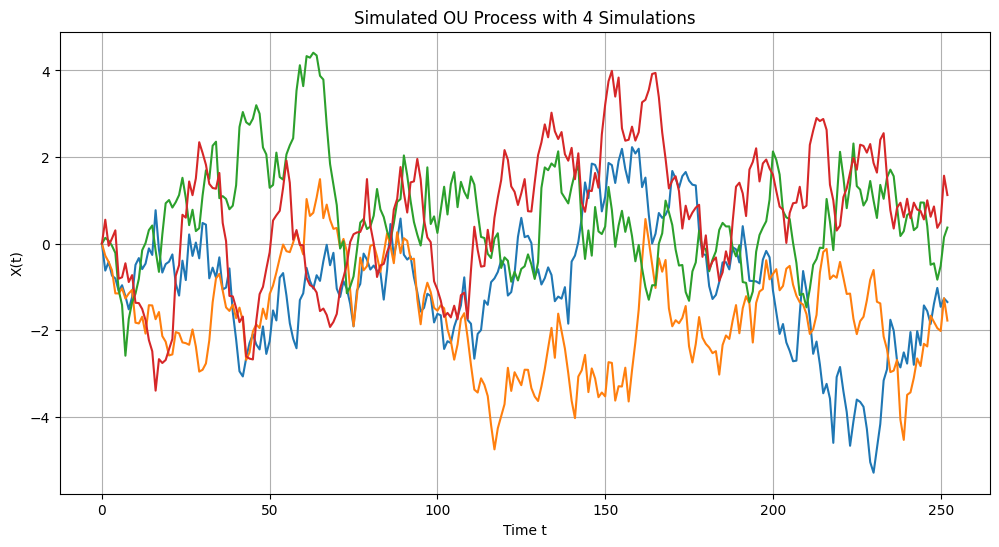

In [5]:
def simulate_ou_process(kappa, mu, sigma, dt, T, X0, seed):
    """
    Simulate an OU process given parameters.
    """
    np.random.seed(seed)

    def dW(dt: float) -> float:
        return np.random.normal(loc=0.0, scale=np.sqrt(dt))

    # implement the Euler-Maruyama scheme
    N = T / dt
    times = np.arange(0, T + dt, dt)
    assert times.size == N + 1, "T must be a multiple of dt"
    x = np.zeros(times.size)
    x[0] = X0
    for i in range(1, times.size):
        t = (i - 1) * dt
        xold = x[i - 1]
        x[i] = xold - kappa(xold, t) * (xold - mu(xold, t)) * dt + sigma(xold, t) * dW(dt)

    return times, x

def plot_simulations(num_sims: int):
    """
    Plot `num_sims` simulations in one plot.
    """
    plt.figure(figsize=(12,6))
    for i in range(num_sims):
        plt.plot(*simulate_ou_process(
            lambda x,t: KAPPA, 
            lambda x,t: MU, 
            lambda x,t: SIGMA, 
            DT, 
            T, 
            X0, 
            SEED+i if isinstance(SEED, int) else None
        ))
    plt.title(f"Simulated OU Process with {num_sims} Simulations")
    plt.grid(True)
    plt.xlabel("Time t")
    plt.ylabel("X(t)")
    plt.show()


NUM_SIMS = 4
KAPPA = 0.05
MU = 0
SIGMA = 0.5
DT = 1
T = 252
X0 = 0
SEED = None  # change this to an integer to get reproducible results

plot_simulations(NUM_SIMS)

# Questions {-}

# Question 1

(3 points)

Derive the estimators for the OU process parameters $\kappa$, $\mu$, and $\sigma_{\text{eq}}$ in terms of the estimated parameters of the AR(1) process given in the Estimation section above. 

Hint: Use the solution equation and put it into the form of a discretized AR(1) process. Use the AR(1) process's estimated parameters to match the values for the solution equation to derive the estimator equations. Equations for $\kappa$ and $\mu$ are easy to derive, but $\sigma_{\text{eq}}$ is just a touch more involved. You can use the equation for the equilibrium distribution above for help. Try not to confuse the different $\sigma$'s in the equations.

---

**Solution:**

We first derive OU estimators from an AR(1) regression

From above background information, we know the OU process satisfies

$$
dX_t = -\kappa (X_t - \mu)\,dt + \sigma\,dW_t, \qquad \kappa>0,
$$

and we observe $X_t$ on an equally spaced grid with step size $\Delta t$.

From the exact OU solution over one step $[t,\,t+\Delta t]$,

$$
X_{t+\Delta t}
= e^{-\kappa \Delta t}X_t
+ (1-e^{-\kappa \Delta t})\mu
+ \sigma\int_t^{t+\Delta t} e^{-\kappa(t+\Delta t-s)}\,dW_s,
$$

define the innovation

$$
\zeta_{t+\Delta t}
:= \sigma\int_t^{t+\Delta t} e^{-\kappa(t+\Delta t-s)}\,dW_s.
$$

From the earlier result on It\^o integrals, the mean of the It\^o integral is zero, hence

$$
\mathbb{E}\!\left[\zeta_{t+\Delta t}\right]=0.
$$

Then the discretely observed OU process has the AR(1) form

$$
X_{t+\Delta t} = a + bX_t + \zeta_{t+\Delta t},
$$

with coefficient matching

$$
b = e^{-\kappa \Delta t},
\qquad
a = (1-e^{-\kappa \Delta t})\mu = (1-b)\mu.
$$

Now run the lag-1 regression (AR(1))

$$
X_{t+\Delta t} = a + bX_t + \zeta_{t+\Delta t},
$$

and let $\hat a,\hat b$ be the estimated intercept and slope, and let $\hat\sigma_\zeta^2$ be the estimated innovation variance (i.e., the regression residual variance).

Matching $b=e^{-\kappa \Delta t}$ gives

$$
\hat\kappa = -\frac{1}{\Delta t}\log(\hat b).
$$

Matching $a=(1-b)\mu$ gives

$$
\hat\mu = \frac{\hat a}{1-\hat b}.
$$

To obtain the equilibrium variance, recall that the OU equilibrium distribution is

$$
X_\infty \sim \mathcal{N}\!\left(\mu,\ \sigma_{\mathrm{eq}}^2\right),
\qquad
\sigma_{\mathrm{eq}}^2=\frac{\sigma^2}{2\kappa}.
$$

A stationary AR(1) with $|b|<1$ satisfies the variance identity

$$
\operatorname{Var}(X)=b^2\operatorname{Var}(X)+\sigma_\zeta^2
\qquad\Longrightarrow\qquad
\operatorname{Var}(X)=\frac{\sigma_\zeta^2}{1-b^2}.
$$

Since the sampled OU process is exactly this AR(1), its stationary variance equals the OU equilibrium variance, hence

$$
\sigma_{\mathrm{eq}}^2=\frac{\sigma_\zeta^2}{1-b^2}
\qquad\Longrightarrow\qquad
\hat\sigma_{\mathrm{eq}}^2=\frac{\hat\sigma_\zeta^2}{1-\hat b^2},
\qquad
\hat\sigma_{\mathrm{eq}}=\sqrt{\frac{\hat\sigma_\zeta^2}{1-\hat b^2}}.
$$

**Above all, we get solution below (in terms of AR(1) estimates):**

$$
\boxed{
\hat\kappa = -\frac{1}{\Delta t}\log(\hat b),\qquad
\hat\mu = \frac{\hat a}{1-\hat b},\qquad
\hat\sigma_{\mathrm{eq}}^2 = \frac{\hat\sigma_\zeta^2}{1-\hat b^2}.
}
$$

---

# Question 2

(5 points)

Now you'll implement these estimators in Python. The function `estimate_ou_parameters` in `hw4.py` takes a time series of residuals and estimates the parameters of the OU process using the method described above. 

As a rough guide, here is what the function should do:

1. Cumulatively sum the residual returns to get the residual, and create a 1-lagged residual.
2. Compute the mean and variance of the residuals.
3. Compute the mean and variance of the lagged residuals.
4. Compute the covariance between the residuals and the lagged residuals.
5. Compute the slope and intercept of the regression line.
6. Compute the parameters of the OU process using the equations from the Estimation section.
7. Compute the $R^2$ value of the regression.
8. Create an integer-valued mask (1 for True and 0 for False) for the residuals that are not mean-reverting where: `mask = (betas > 0.0) & (betas <= config['B_THRESHOLD']) & (r_squared >= config['R_SQUARED_THRESHOLD'])`
9. Create the Avellaneda-Lee "s-score" signal, defined as $\text{signal} = (X_t - \mu)/\sigma_{\text{eq}}$.
10. Set the parameters `mu`, `sigma`, `kappa`, and `signal` to zero for the residuals that have a mask value of 0.
10. Return everything you've computed in a DataFrame, where each row corresponds to a residual.

Please complete the `estimate_ou_parameters` function in `hw4.py` and paste the function below. In your implementation, use vectorized operations and avoid using loops. Our implementation of the code to complete is about 30 lines, but yours may be longer or shorter depending on your style.

In [7]:
# Your function here
def estimate_ou_parameters(
    residual_returns: pd.DataFrame, 
    config: dict,
) -> pd.DataFrame:
    """
    Estimates OU parameters from a DataFrame of residual returns.

    Parameters:
    -----------
    residual_returns: pd.DataFrame
        A TxN DataFrame of residual returns.
    config: dict
        Configuration parameters for OU parameter estimation, containing:
        - R_SQUARED_THRESHOLD: float, the minimum threshold for the R^2, e.g. 0.25
        - B_THRESHOLD: float, the maximum threshold for beta, e.g. 0.99

    Returns:
    --------
    pd.DataFrame
        A DataFrame containing the estimated parameters (all floats)
        with index as the tickers of the residuals and columns as the variables:
        - y_last: last value of the residual process
        - mu: mean of the residual process
        - sigma: equilibrium standard deviation of the residual process
        - kappa: mean reversion speed
        - r_squared: R^2 value of the regression
        - b: beta coefficient of the regression
        - a: intercept of the regression
        - mask: boolean mask indicating valid residual processes
        - signal: standardized signal for the residual process
    """
    variables = ['y_last', 'mu', 'sigma', 'kappa', 'r_squared', 'b', 'a', 'mask', 'signal']
    
    T, N = residual_returns.shape
    cumulative_sums = residual_returns.cumsum(skipna=True, axis=0)
    params = np.zeros((N, len(variables)), dtype=np.float32)
    
    x = cumulative_sums.values.T

    # ===> YOUR CODE BELOW <===
    if T < 2:
        return pd.DataFrame(params, columns=variables, index=residual_returns.columns)

    # AR(1): y = a + b x_lag + zeta
    x_lag = x[:, :-1]
    y = x[:, 1:]

    # valid pairs: both observed (not NaN)
    valid = (~np.isnan(x_lag)) & (~np.isnan(y))
    n = valid.sum(axis=1).astype(np.float32)
    n_safe = np.where(n > 0, n, 1.0).astype(np.float32)

    # masked means
    sum_x = np.where(valid, x_lag, 0.0).sum(axis=1)
    sum_y = np.where(valid, y, 0.0).sum(axis=1)
    mean_x = sum_x / n_safe
    mean_y = sum_y / n_safe

    # masked var/cov
    dx = x_lag - mean_x[:, None]
    dy = y - mean_y[:, None]
    var_x = np.where(valid, dx * dx, 0.0).sum(axis=1) / n_safe
    var_y = np.where(valid, dy * dy, 0.0).sum(axis=1) / n_safe
    cov_xy = np.where(valid, dx * dy, 0.0).sum(axis=1) / n_safe

    # OLS slope/intercept
    b = np.where(var_x > 0.0, cov_xy / var_x, 0.0).astype(np.float32)
    a = (mean_y - b * mean_x).astype(np.float32)

    # innovation variance and R^2
    y_hat = a[:, None] + b[:, None] * x_lag
    eps = y - y_hat
    sigma_zeta2 = (np.where(valid, eps * eps, 0.0).sum(axis=1) / n_safe).astype(np.float32)
    r_squared = np.where(var_y > 0.0, 1.0 - sigma_zeta2 / var_y, 0.0).astype(np.float32)

    # OU mapping (dt defaults to 1.0)
    dt = float(config.get("DT", 1.0))

    kappa = np.where(b > 0.0, -(1.0 / dt) * np.log(b), 0.0).astype(np.float32)

    denom_mu = (1.0 - b).astype(np.float32)
    mu = np.where(np.abs(denom_mu) > 1e-12, a / denom_mu, 0.0).astype(np.float32)

    denom_var = (1.0 - b * b).astype(np.float32)
    sigma_eq2 = np.where(denom_var > 0.0, sigma_zeta2 / denom_var, 0.0).astype(np.float32)
    sigma_eq = np.sqrt(np.maximum(sigma_eq2, 0.0)).astype(np.float32)

    # forward-fill within each column, then take the last row as the last available value
    y_last = cumulative_sums.ffill().iloc[-1].fillna(0.0).values.astype(np.float32)

    # s-score
    signal = np.zeros_like(sigma_eq, dtype=np.float32)
    np.divide((y_last - mu).astype(np.float32), sigma_eq, out=signal, where=sigma_eq > 0.0)

    # mask (mean-reverting and quality thresholds)
    mask_bool = (b > 0.0) & (b <= config["B_THRESHOLD"]) & (r_squared >= config["R_SQUARED_THRESHOLD"])
    mask = mask_bool.astype(np.float32)

    # zero-out invalid residuals
    mu *= mask
    sigma_eq *= mask
    kappa *= mask
    signal *= mask

    # pack results
    params[:, variables.index('y_last')] = y_last
    params[:, variables.index('mu')] = mu
    params[:, variables.index('sigma')] = sigma_eq
    params[:, variables.index('kappa')] = kappa
    params[:, variables.index('r_squared')] = r_squared
    params[:, variables.index('b')] = b
    params[:, variables.index('a')] = a
    params[:, variables.index('mask')] = mask
    params[:, variables.index('signal')] = signal
    # ===> YOUR CODE ABOVE <===

    result_df = pd.DataFrame(params, columns=variables, index=residual_returns.columns)
    
    return result_df

Now, to check that it's working, we'll estimate residuals and plot the process parameters and signals for a given residual. 

Note that here we select the asset universe using the *entire* set of future prices/returns, which induces lookahead bias. This is to simplify this homework and allow us to write different parts of this analysis in different questions, but in practice you should never use future data to select the asset universe. Instead, you should use the past data to select the asset universe and then use the same past data to estimate parameters, compute signals, forecast returns, optimize the portfolio, make the trades, etc.

It's also worth noting that in some cases the universe can be scoped down using a less strict filter which looks at future data, and then a stricter point-in-time filter can be applied at each universe selection time point (e.g. each month); however, one has to be very careful to ensure that the stricter filter is contained within the less strict filter and does not use future data itself. In any case, this is not what's done below.

In [9]:
# Select the universe of assets to be used in the factor models
config = {
    'LOOKBACK_PERIOD': len(returns) - 1,
    'FILTER_MAX_ABS_RETURN': 0.5
}
valid_prices, valid_returns, valid_stocks = select_asset_universe(
    prices, 
    returns, 
    prices.index[-1], 
    config
)

config.update({
    'USE_INTERCEPT': False,
    'FACTOR_MODEL': 'pca',  # 'pca' or 'sector'
    'N_FACTORS': 15,  # Number of factors for PCA
    'RESIDUAL_ESTIMATION_LOOKBACK_DAYS': 60,
    'FACTOR_ESTIMATION_FREQUENCY_DAYS': 5,
    'VERBOSE': False,
})

T = len(valid_returns)
N = len(valid_returns.columns)

(
    residual_returns, 
    residual_prices, 
    comp_mtxs, 
    estimation_dates, 
    alphas,
) = estimate_oos_residuals(
    valid_returns,
    valid_prices,
    metadata,
    config
)

In [10]:
config.update({
    'OU_ESTIMATION_LOOKBACK_DAYS': 60,
    'B_THRESHOLD': np.exp(-1/30),  # from the paper
    'R_SQUARED_THRESHOLD': 0.25,
})

signals = []

for t in range(config['RESIDUAL_ESTIMATION_LOOKBACK_DAYS'], T):
    resids_lookback = residual_returns.iloc[t-config['OU_ESTIMATION_LOOKBACK_DAYS']:t]
    estimation_date = resids_lookback.index[-1]
    if len(resids_lookback) < config['OU_ESTIMATION_LOOKBACK_DAYS']:
        continue
    if config.get('VERBOSE', False) and t % config['OU_ESTIMATION_LOOKBACK_DAYS'] == 0:
        print(f"Estimating OU parameters at time {t} (date {resids_lookback.index[-1]})...")
    # Estimate OU parameters for the residuals
    signals_t = estimate_ou_parameters(resids_lookback, config)
    # Deal with case where intercept is used (though we won't use the intercept in this homework)
    if config['USE_INTERCEPT']:
        if estimation_date in alphas.index:
            signals_t['alpha'] = alphas.loc[estimation_date]
        else:
            latest_alpha_date = alphas.index[alphas.index < estimation_date].max()
            signals_t['alpha'] = (
                alphas.loc[latest_alpha_date] 
                if latest_alpha_date is not None 
                else np.nan
            )
        signals_t['signal_mod'] = (
            signals_t['signal'] 
            - signals_t['alpha'] / (signals_t['sigma'] * signals_t['kappa'])
        )
        signals_t.loc[signals_t['mask'] == 0, 'signal_mod'] = 0  # Set signal_mod to 0 where mask is 0
    signals_t['date'] = estimation_date
    signals_t = signals_t[['date'] + signals_t.columns[:-1].tolist()]
    signals.append(signals_t)
    
signals_df = pd.concat(signals)
# Make multiindex from date column and index
signals_df.index.name = 'ticker'
signals_df.set_index(['date', signals_df.index], inplace=True)

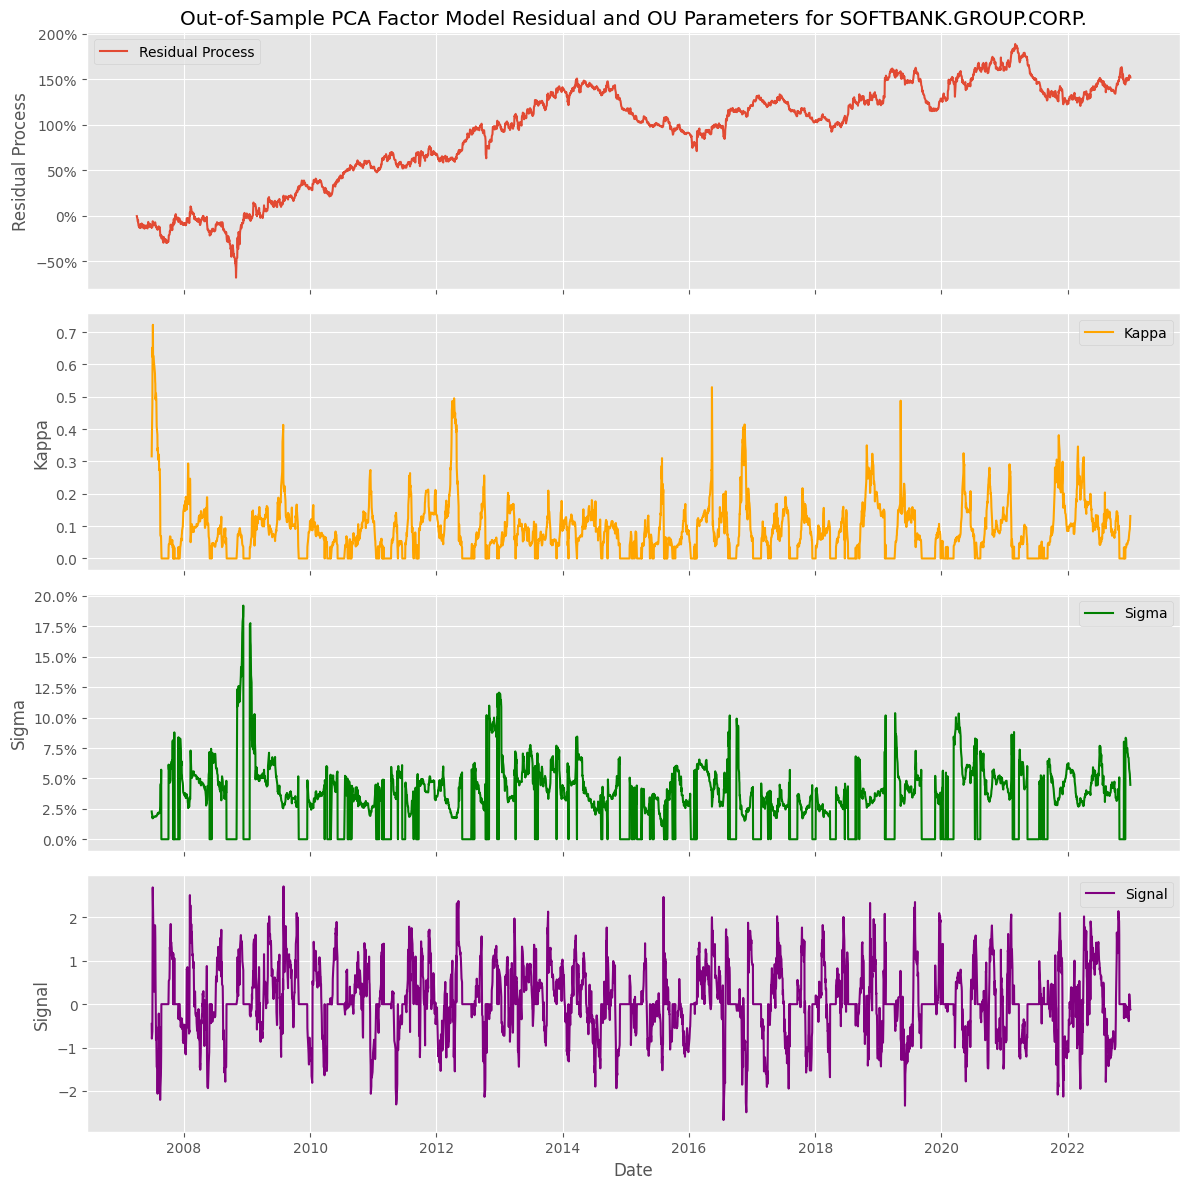

In [11]:
# Choose some asset to plot
ticker_to_plot = valid_stocks[-1]
company_name = metadata.loc[ticker_to_plot, 'Company']

# Plot the factor model predictions vs the actual cumulative returns for the ticker
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(nrows=5 if config['USE_INTERCEPT'] else 4, 
                             ncols=1, figsize=(12, 12), sharex=True)
    axes[0].set_title(f"Out-of-Sample {config['FACTOR_MODEL'].upper()} "
                      f"Factor Model Residual and OU Parameters for {company_name}")

    axes[0].plot(residual_returns[ticker_to_plot].cumsum(), label='Residual Process')
    axes[0].set_ylabel('Residual Process')
    axes[0].legend()
    axes[0].yaxis.set_major_formatter(mpl_ticker.PercentFormatter(xmax=1))

    axes[1].plot(signals_df.xs(ticker_to_plot, level='ticker', drop_level=True).kappa, 
                 label='Kappa', color='orange')
    axes[1].set_ylabel('Kappa')
    axes[1].legend()
    
    axes[2].plot(signals_df.xs(ticker_to_plot, level='ticker', drop_level=True).sigma, 
                 label='Sigma', color='green')
    axes[2].set_ylabel('Sigma')
    axes[2].legend()
    axes[2].yaxis.set_major_formatter(mpl_ticker.PercentFormatter(xmax=1))

    if config['USE_INTERCEPT']:
        axes[3].plot(signals_df.xs(ticker_to_plot, level='ticker', drop_level=True).signal_mod, 
                     label='Signal (Modified)', color='purple')
        axes[3].set_ylabel('Signal')
        axes[3].legend()
        axes[4].plot(alphas[ticker_to_plot], label='Intercept (Daily Alpha)', color='red')
        axes[4].set_ylabel('Alpha')
        axes[4].legend()
        axes[4].yaxis.set_major_formatter(mpl_ticker.PercentFormatter(xmax=1))
    else:
        axes[3].plot(signals_df.xs(ticker_to_plot, level='ticker', drop_level=True).signal, 
                     label='Signal', color='purple')
        axes[3].set_ylabel('Signal')
        axes[3].legend()

    axes[-1].set_xlabel('Date')

    plt.tight_layout()
    plt.show()

# Question 3

(8 points)

In the Avellaneda & Lee paper, trading is performed in a "bang-bang" fashion, meaning that the signal is used to determine when to buy and sell the residual. No trading in the residual occurs in between these times. However, to assess the performance of the signal itself (apart from position sizing dynamics), or use it in a portfolio optimization context, it's nice to have a forecast of the residual returns. 

To do this, we'll regress the future residual returns on the signal. Our model for the expected future residual returns is given by:
$$
\mathbb{E}[r_{t+1:t+H} | \,\text{signal}_t] = \beta_0 + \beta_1 \cdot \text{signal}_t
$$

where we define 
$$
r_{t+1:t+H} := \left[ \prod_{\tau=1}^H (1 + r_{t+\tau}) \right] - 1
$$

as the $H$-period cumulative return, $\beta_0$ is the intercept, and $\beta_1$ is the slope of the regression line.

We'll train one regression model across all the residuals, and use a rolling window to compute the regression coefficients. We'll refit the regression coefficients $\beta_0, \beta_1$ periodically.

Complete the function `forecast_residual_returns_ou_signal` in `hw4.py` to implement this regression. The function should take the following parameters:

- `residual_returns`: The DataFrame of valid residual returns.
- `signals_df`: The DataFrame of signals.
- `config`: The configuration dictionary containing the following keys:
  - `RETURN_FORECAST_HORIZON`: The forecast horizon ($H$) in days.
  - `RETURN_FORECAST_LOOKBACK`: The lookback period in days for the rolling regression.
  - `RETURN_FORECAST_REFIT_PERIOD`: The refit period for the regression coefficients, such as 'M' for monthly (no need to implement periods).

The function should return a DataFrame of the same shape with the same index and columns as `residual_returns` which contains the forecasted residual returns based on the signals. The forecasted returns should be computed using a linear regression of the future residual returns on the signals, using a rolling window of size `RETURN_FORECAST_LOOKBACK`. Fill any missing values in the forecasted returns (e.g. which are inside the first `RETURN_FORECAST_LOOKBACK` days) with NaN.

To be explicit, here's what our implementation does:

1. Extract configuration parameters from the config dictionary, create any empty DataFrames to store forecasted returns, future cumulative returns, and beta coefficients.
2. Extract signals and masks from the multiindex signals DataFrame into regular non-multiindex DataFrames.
3. Precompute future cumulative returns for all dates.
4. Loop through each date in the residual returns DataFrame:
    - Skip dates with insufficient lookback or future horizon data
5. Determine when to refit the regression model. Convert current date to a period (e.g., monthly) using the refit period from config. Only refit when entering a new period (e.g., new month).
6. If refitting, collect training data:
    - Get past signals, masks, and future returns for the lookback period
    - Only include tickers with valid mask (=1), non-NaN signals, and non-NaN future returns
    - Stack all valid (signal, future return) pairs across all tickers and dates into X and y arrays
7. Fit the linear regression model (we use `scipy.stats.linregress`, but you can use whatever you want):
    - Calculate slope, intercept, and r-value
    - Store coefficients in the beta coefficients DataFrame
8. Make predictions for each ticker using the fitted model:
    - For each ticker with a non-NaN signal, calculate forecast = beta_0 + beta_1 * signal
    - Store the forecast in the forecasted returns DataFrame
9. Return three DataFrames:
    - Forecasted returns
    - Future cumulative returns (actual future returns for evaluation)
    - Beta coefficients (regression parameters for each refit date)

Paste your implementation of the `forecast_residual_returns_ou_signal` function below. Our implementation of the code to complete is about 50 lines, but yours may be longer or shorter depending on your style.

In [12]:
# Your function here

def forecast_residual_returns_ou_signal(
    residual_returns: pd.DataFrame,
    signals: pd.DataFrame,
    config: dict,
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Forecasts residual returns from OU signals by regressing future cumulative residual returns
    on the signal. Fits one regression model across all tickers on a monthly basis.
    """
    # Extract configuration parameters
    horizon = config['RETURN_FORECAST_HORIZON']
    lookback = config['RETURN_FORECAST_LOOKBACK']
    verbose = config.get('VERBOSE', False)
    refit_period = config.get('RETURN_FORECAST_REFIT_PERIOD', 'M')
    
    # Create a DataFrame to store the forecasted returns with the same index and columns as returns
    forecasted_returns = pd.DataFrame(np.nan, index=residual_returns.index, columns=residual_returns.columns)
    
    # Get all dates from the returns DataFrame
    dates = residual_returns.index.tolist()
    
    # Extract the signals and masks into regular DataFrames
    signal_values = signals.reset_index().pivot(index='date', columns='ticker', values='signal')
    mask_values = signals.reset_index().pivot(index='date', columns='ticker', values='mask')
    
    # Ensure they align with returns dates
    signal_values = signal_values.reindex(residual_returns.index)
    mask_values = mask_values.reindex(residual_returns.index)
    
    # Precompute future cumulative returns for all dates
    future_cumul_returns = pd.DataFrame(np.nan, index=residual_returns.index, columns=residual_returns.columns)
    for i, date in enumerate(dates):
        if i + 1 + horizon <= len(dates):
            # Get returns from t+1 to t+horizon
            future_rets = residual_returns.iloc[i+1:i+1+horizon]
            # Calculate cumulative return
            future_cumul_returns.loc[date] = (1 + future_rets).prod() - 1
    
    # Initialize regression coefficients
    beta_0 = 0.0  # intercept
    beta_1 = 0.0  # slope
    last_refit_month = None
    
    # Create a DataFrame to store the regression coefficients
    beta_coefficients = []
    beta_dates = []
    
    # For each date in the returns DataFrame
    for i, current_date in enumerate(dates):
        
        # ===> YOUR CODE BELOW <===

        # Skip early dates
        if i < lookback:
            continue
            
        # Skip late dates
        if i + 1 + horizon > len(dates):
            continue

        current_month = pd.Timestamp(current_date).to_period(refit_period)

        should_refit = (last_refit_month is None or current_month != last_refit_month)

        if should_refit:
            if verbose:
                print(f"Refitting forecast regression at {current_date} (month {current_month})")

            start_idx = i - lookback
            end_idx = i
            window_dates = residual_returns.index[start_idx:end_idx]

            X_list = []
            y_list = []

            for d in window_dates:
                s_row = signal_values.loc[d]
                m_row = mask_values.loc[d]
                y_row = future_cumul_returns.loc[d]

                valid_mask = ((m_row == 1)& s_row.notna()& y_row.notna())

                if valid_mask.any():
                    X_list.extend(s_row[valid_mask].astype(float).tolist())
                    y_list.extend(y_row[valid_mask].astype(float).tolist())

            if len(X_list) >= 2:
                reg = stats.linregress(X_list, y_list)
                beta_1 = float(reg.slope)
                beta_0 = float(reg.intercept)

                beta_coefficients.append({
                    "beta_0": beta_0,
                    "beta_1": beta_1,
                    "r_value": float(reg.rvalue),
                    "p_value": float(reg.pvalue),
                    "stderr": float(reg.stderr) if reg.stderr is not None else np.nan,
                    "n_obs": float(len(X_list)),})

                beta_dates.append(pd.Timestamp(current_date))

            else:
                beta_0 = 0.0
                beta_1 = 0.0
                beta_coefficients.append({
                    "beta_0": beta_0,
                    "beta_1": beta_1,
                    "r_value": np.nan,
                    "p_value": np.nan,
                    "stderr": np.nan,
                    "n_obs": float(len(X_list)),})

                beta_dates.append(pd.Timestamp(current_date))

            last_refit_month = current_month

        # Make forecasts for current_date
        s_today = signal_values.loc[current_date]
        m_today = mask_values.loc[current_date]

        valid_forecast = (s_today.notna()& (m_today == 1))

        if valid_forecast.any():
            forecasted_returns.loc[current_date,valid_forecast.index[valid_forecast]] = (
                beta_0+ beta_1 * s_today[valid_forecast].astype(float))

        # ===> YOUR CODE ABOVE <===
    
    # Create DataFrame of beta coefficients
    beta_df = pd.DataFrame(beta_coefficients, index=beta_dates)
    
    return forecasted_returns, future_cumul_returns, beta_df

Finally, we'll forecast the returns and perform some analysis on the forecasted returns. There are many ways to do this, but we'll focus on the information coefficient (IC) of the forecasted returns, which is a measure of the quality of the forecast. The IC is defined as the correlation between the forecasted returns and the actual returns. A higher IC indicates a better forecast. The IC can be computed for a single asset (N.B.: a residual is an asset) using the following equation:

$$
\text{IC} := \frac{\text{Cov}(\hat r_{t}, r_{t})}{\sigma_{\hat r_{t}} \sigma_{r_{t}}}
$$

where $r_{t}$ is the actual return at time $t$, $\hat r_{t}$ is the forecasted return at time $t$, and $\sigma_{r_{t}}$ and $\sigma_{\hat r_{t}}$ are the standard deviations of the actual and forecasted returns, respectively. 

The IC can take values between -1 and 1, where 0 means no signal and $\pm 1$ means perfect signal (though in the case of -1, the signal is perfectly wrong; we'll just adopt the convention of referring to the positive end of the spectrum). A range for the IC might be between 0.0 and 0.3, depending on the period, market, horizon, and other factors. Typical values for monthly equity returns in developed markets for firms engaged in quantitative trading might fall between roughly 0.0 and 0.20, but can vary significantly depending on the specific market, time period, and skill of the firm.

Note that although we give the IC for the next time step, it can be computed for any time step. For example, if we expect to hold over a horizon $H$, we can compute the IC for the forecasted returns between time $t+1$ and $t + H$ (inclusive) using the same equation.

Below we run the function and calculate the information coefficient of the return forecasts separately for each residual. We set the forecast horizon to about one month (20 trading days), the lookback period to about three months (60 trading days; same as our other estimation periods), and refit the forecast model every month. We then print the median IC and plot a histogram of the ICs. Don't be surprised if the median IC isn't very high or is insignificant.

In [17]:
config.update({
    'RETURN_FORECAST_HORIZON': 20,
    'RETURN_FORECAST_LOOKBACK': 60,
    'RETURN_FORECAST_REFIT_PERIOD': 'M',
    'VERBOSE': False,
})

(
    ou_forecasted_residual_returns, 
    future_cumul_returns, 
    beta_df,
) = forecast_residual_returns_ou_signal(
    residual_returns, 
    signals_df, 
    config,
)

Median IC: 0.0157


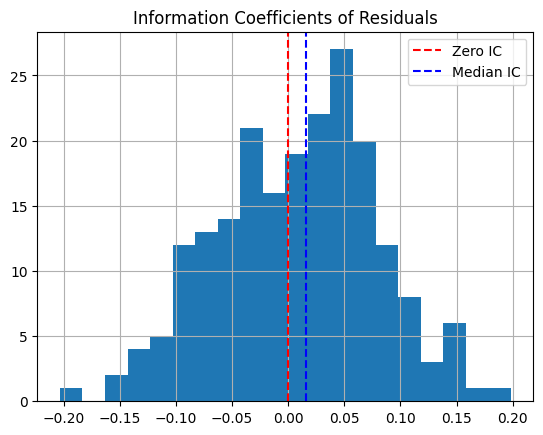

In [18]:
# Calculate the information coefficient between the forecasted and actual returns
ic = ou_forecasted_residual_returns.corrwith(future_cumul_returns)
print("Median IC:", ic.median().round(4))
ic.hist(bins=20)
plt.axvline(0, color='red', linestyle='--', label='Zero IC')
plt.axvline(ic.median(), color='blue', linestyle='--', label='Median IC')
plt.legend()
plt.title('Information Coefficients of Residuals')
plt.show()

# Question 4

(8 points)

Using the OU process to model the residuals is a decent idea, but in practice, residuals are much more complex. It's more ideal to have a forecasting model which can predict the residual returns directly, without parametric assumptions. In this question, we'll derive a noisy oracle forecasting model for the residual returns. The noisy oracle forecasting model will provide forecasts of returns which have a certain level of signal.

"Oracle" here means that we use the true future returns as part of our forecast. So, this is a forecasting model which is as good as you specify it to be. Using this model, we can perform a backtest or optimize a portfolio to see how well it performs under a particular level of forecasting skill. This lets us vary the forecasting skill of the model to see what level of skill is needed to achieve a certain level of portfolio performance. That's nice, because it gives us a number to hit when we're trying to improve the performance of our forecasting model.

The metric with which we will parameterize the signal is the information coefficient (IC) of the forecast. We'll choose the IC to be a parameter of the model, and then use this parameter to derive the level of noise which we add to the true returns to get our forecasted returns.

## Part 1

Now we'll derive the noisy oracle forecasting model for the residual returns. Your task is to find the amount of Gaussian noise to add to the future returns to achieve a desired IC. The model is given by the following equation for the noisy oracle forecast:
$$
\hat r_{t+\Delta t} = r_{t+\Delta t} + \sigma_\eta Z_{t+\Delta t}
$$
where $\hat r_{t+\Delta t}$ is the return forecast, $r_{t+\Delta t}$ is the true return, $\sigma_\eta$ is the standard deviation of the noise, and $Z_{t+\Delta t}$ is a standard normal random variable. The objective is to derive an expression for the optimal noise level $\sigma_\eta$ which achieves a given IC.

Derive the expression for the optimal standard deviation of the noise $\sigma^2_\eta$.

Hint: Set the model to a particular IC and solve for the noise level $\sigma_\eta$.

---

**Solution:**

---

## Part 2

We will furthermore find the optimal scaling factor for this forecast to give it a normalized scale. This will be done by finding the optimal scaling factor $\alpha$ which minimizes the mean squared error (MSE) of the forecast. The MSE is given by the following equation:

$$
\text{MSE} := \mathbb{E}\left[ \left( \alpha \hat r_{t+\Delta t} - r_{t+\Delta t} \right)^2 \right].
$$

We will solve the problem 

$$
\min_{\alpha} \left \{ \text{MSE} \right\} = \min_{\alpha} \mathbb{E}\left[ \left( \alpha \hat r_{t+\Delta t} - r_{t+\Delta t} \right)^2 \right].
$$

Derive the optimal scaling factor $\alpha$ which minimizes the MSE.

Hint: it's a pretty simple function of the IC.

---

**Solution:**

---

## Part 3

Complete the function `forecast_returns_noisy_oracle` in `hw4.py` to implement the noisy oracle forecasting model. 

To be clear, here is what our function does:

1. Takes residual returns and config parameters
2. Calculates future cumulative returns over a specified horizon. As an approximation, we just use the mean of the returns over the horizon to represent this (consequently, the function runs a lot more quickly).
3. Calculates the variance of the returns, $\sigma^2_{\eta}$ (the variance of the random noise scaled by the information coefficient), and $\alpha$ (the optimal coefficient).
4. Creates noise with standard deviation $\sigma_{\eta}$.
4. Returns `alpha * (future_returns + noise)` as the forecast.

Paste your implementation of the function below. In your implementation, use vectorized operations and avoid using loops. Our implementation of the code to complete is less than 10 lines, but yours may be longer or shorter depending on your style.

In [ ]:
# Your function here

We'll now use this function to create the residual return forecasts and compute the information coefficient of the forecasts to make sure that the IC is as expected. The median IC should be near 0.10, though the histogram should have some spread.

In [ ]:
config.update({
    'RETURN_FORECAST_HORIZON': 21,
    'INFORMATION_COEFFICIENT': 0.10,
    'SEED': 42,
})

oracle_forecasted_residual_returns = forecast_returns_noisy_oracle(
    residual_returns, 
    config
)

# calculate the information coefficient again
ic = oracle_forecasted_residual_returns.corrwith(future_cumul_returns)
ic.hist(bins=20)
print("Median IC:", ic.median().round(4))
plt.title('Information Coefficients of Residuals')
plt.show()

# Question 5

(3 points)

We will now use the residuals and the noisy oracle forecasting model to optimize a portfolio of residuals. The portfolio optimization problem is given by the following equation:

$$
\max_{\mathbf{w}} \left \{ \mathbf{w}^T \mathbf{\hat r} - \frac{\gamma}{2} \mathbf{w}^T \hat\Sigma \mathbf{w} \right\}
$$

where $\mathbf{w}$ is the vector of portfolio weights, $\hat \Sigma$ is the expected covariance matrix of the residual returns, and $\mathbf{\hat r}$ is the vector of expected returns. The parameter $\gamma$ controls the risk aversion of the portfolio, with higher values of $\gamma$ leading to more risk-averse portfolios. Here, we use $\gamma = 1$. The objective is to maximize the portfolio's expected return while minimizing the portfolio's $\gamma$-weighted expected variance.

The optimization problem is subject to the following constraints:

$$
\mathbf{1}^T \mathbf{w} = 0, \quad \|\mathbf{w}\|_\infty \leq 0.05, \quad \|\mathbf{w}\|_1 \leq 1, \quad \|\mathbf{w}_t - \mathbf{w}_{t-1}\|_1 \leq 0.25
$$

The first constraint ensures that the portfolio weights in residual-space sum to zero and enforces long-short neutrality, the second constraint ensures that the maximum allocation we make to any one residual is at most 5% in magnitude, the third constraint ensures that the total leverage of the portfolio in residual-space is bounded by 1, and the fourth constraint ensures that the change in weights in residual-space from one time step to the next (which is a proxy for turnover) is bounded by 25%. We've set these bounds a priori to sane default values based on our experience, but better ones can almost certainly be found.

The optimization problem can be solved using the `cvxpy` library, which is a Python library for convex optimization. The library provides an efficient interface for solving convex optimization problems, and it's widely used in the quantitative finance community. We encourage you to check out library online.

We implement the portfolio optimization problem in `hw4.py` in the function `run_portfolio_optimization`. The function calculates the optimized portfolio weights for a given set of return forecasts and residual returns (from which it calculates a simple covariance matrix forecast).

We run this function below to optimize the portfolio of residuals using the noisy oracle forecasting model with an IC of 0.10.

In [ ]:
config.update({
    'RISK_AVERSION': 1.0,
    'MAX_LEVERAGE': 1.0,
    'MAX_WEIGHT': 0.05,
    'MAX_TURNOVER': 0.25,
    'TRANSACTION_COST': 0.0005,
    'BORROW_COST': 0.0001,
    'REBALANCING_PERIOD': 'W',
    'VERBOSE': False,
})

portfolio_weights, net_returns, performance_metrics = run_portfolio_optimization(
    residual_returns, 
    config, 
    oracle_forecasted_residual_returns
)

Answer the following questions:

1. What do you notice about the performance? 
2. Do you see any issues with this portfolio optimization approach? What would be a more accurate approach? (Hint: consider that the residuals are themselves portfolios)
3. Do you think the noisy oracle model of forecasting returns is useful? Why or why not? How could the noisy oracle model of forecasting returns be made more realistic?
4. Earlier, we explored one method of forecasting residual returns using the OU process signal. However, any other method of forecasting residual returns can be used in practice. In fact, the features used in the method are usually just as, if not more important, than the method itself. What kind of methods and features do you think would be useful for forecasting residual returns? Which would not be useful? Why? Please don't just list some generic machine learning methods; try to think about the specific context of forecasting residual returns and what features would be useful in that context.

---

**Solution:**

---

# Question 6 (extra credit)

(2 points, extra credit)

In this homework, we've formed just one return forecast based on one signal: the Avellaneda-Lee s-score. In practice, you'll want to build return forecasting models which use many different signals (aka features). Moreover, you might have use different models for different assets or predict over a different horizon. In this question, we'll explore these avenues for improvement.

Do one of the following:

1. Make a new return forecast function which uses multiple features and/or a different horizon. Attempt to make changes which improve the IC on the data from the beginning of the sample period through the end of 2018. Does this improvement translate to a test set data composed of 2019 through the end of the sample period?
2. Examine the cross-section and time-variation of the ICes of the signal model we built earlier. Are there any patterns you can observe in the performance? Can you find a way to classify or predict which tickers have consistently high ICs?

Feel free to add any additional code to the `hw4.py` file and any code or markdown cells below to communicate your results. No need to paste functions you implement here; keep those in `hw4.py`.

=== Alignment ===
Dates: 2007-04-03 to 2022-12-29 | Shape: (3872, 207)

Keeping 207 tickers with >= 20 paired observations.

=== Per-ticker IC (time-series correlation) ===
count=207 | median=0.0157 | IQR=[-0.0416, 0.0564] | min=-0.2035 | max=0.1984

Top 5 tickers by IC:
3099.T    0.1984
8591.T    0.1618
5301.T    0.1503
6472.T    0.1479
8252.T    0.1478
dtype: float64

Bottom 5 tickers by IC:
5713.T   -0.2035
9301.T   -0.1510
4021.T   -0.1439
8604.T   -0.1384
9064.T   -0.1303
dtype: float64 



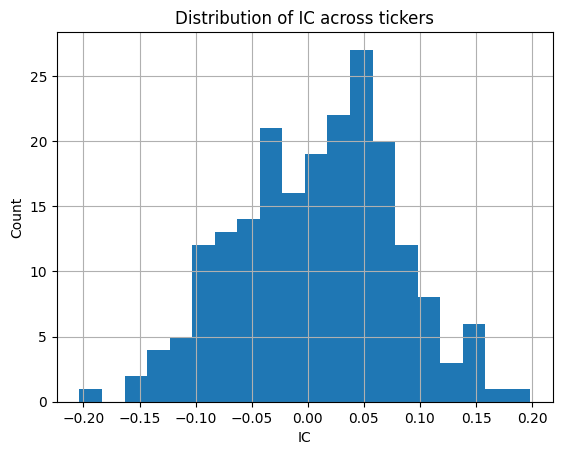

=== Cross-sectional corr(feature, IC) ===
sigma        0.1750
kappa        0.0409
b           -0.0442
r_squared   -0.0459
Name: ic, dtype: float64 

=== IC by sigma terciles ===
      count    mean  median
bin                        
low      69 -0.0099 -0.0050
mid      69  0.0181  0.0305
high     69  0.0146  0.0161 

=== IC by kappa terciles ===
      count    mean  median
bin                        
low      69 -0.0009  0.0059
mid      69  0.0168  0.0239
high     69  0.0069  0.0127 

=== IC by b terciles ===
      count    mean  median
bin                        
low      69  0.0090  0.0177
mid      69  0.0153  0.0218
high     69 -0.0015  0.0059 

=== IC by r_squared terciles ===
      count    mean  median
bin                        
low      69  0.0068  0.0109
mid      69  0.0171  0.0327
high     69 -0.0011  0.0075 

=== Cross-sectional IC (per date) ===
count=3792 | median=0.0076 | IQR=[-0.0566, 0.0682] | min=-0.4010 | max=0.3517



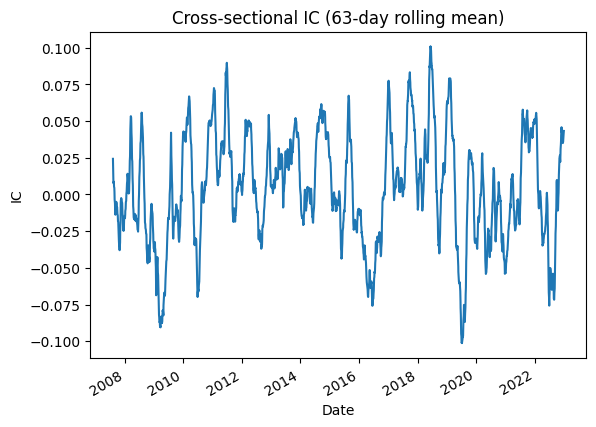

=== Stability of high-IC tickers ===
Spearman rank corr: -0.0032
Top 20% overlap:   0.095



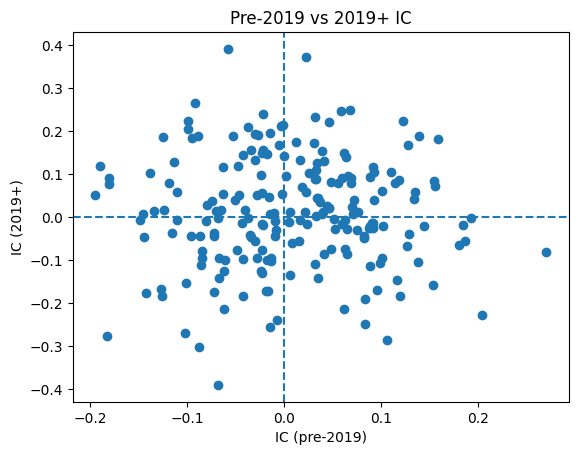

In [21]:
# Option 2

for v in ["ou_forecasted_residual_returns", "future_cumul_returns", "signals_df"]:
    if v not in globals():
        raise NameError(f"Missing `{v}`. Run Q3 and signal construction first.")

F = ou_forecasted_residual_returns.reindex(future_cumul_returns.index).reindex(columns=future_cumul_returns.columns)
Y = future_cumul_returns

print("=== Alignment ===")
print(f"Dates: {F.index.min().date()} to {F.index.max().date()} | Shape: {F.shape}\n")

# Ensure IC is computed on tickers with enough paired observations
min_obs = 20
valid_counts = (~F.isna() & ~Y.isna()).sum(axis=0)
keep = valid_counts[valid_counts >= min_obs].index
F, Y = F[keep], Y[keep]

print(f"Keeping {len(keep)} tickers with >= {min_obs} paired observations.\n")

def summarize_series(s: pd.Series, name: str) -> None:
    s = s.dropna()
    q25, q50, q75 = s.quantile([0.25, 0.50, 0.75])
    print(f"=== {name} ===")
    print(
        f"count={len(s)} | median={q50:.4f} | "
        f"IQR=[{q25:.4f}, {q75:.4f}] | "
        f"min={s.min():.4f} | max={s.max():.4f}\n"
    )

# 1) Cross-section
ic = F.corrwith(Y)
summarize_series(ic, "Per-ticker IC (time-series correlation)")

print("Top 5 tickers by IC:")
print(ic.sort_values(ascending=False).head(5).round(4))
print("\nBottom 5 tickers by IC:")
print(ic.sort_values(ascending=True).head(5).round(4), "\n")

plt.figure()
ic.dropna().hist(bins=20)
plt.title("Distribution of IC across tickers")
plt.xlabel("IC")
plt.ylabel("Count")
plt.show()

# Try to relate cross-sectional IC differences to OU characteristics
features_to_use = [c for c in ["sigma", "kappa", "b", "r_squared"] if c in signals_df.columns]
feat_by_ticker = signals_df[features_to_use].groupby("ticker").median()
tbl = feat_by_ticker.join(ic.rename("ic"), how="inner").dropna(subset=["ic"])

print("=== Cross-sectional corr(feature, IC) ===")
print(tbl.corr(numeric_only=True)["ic"].drop("ic").sort_values(ascending=False).round(4), "\n")

def tercile_table(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    tmp = df[[feature, "ic"]].dropna()
    try:
        tmp["bin"] = pd.qcut(tmp[feature], q=3, labels=["low", "mid", "high"], duplicates="drop")
    except ValueError:
        return pd.DataFrame()
    if tmp["bin"].nunique() < 3:
        return pd.DataFrame()
    return tmp.groupby("bin", observed=False)["ic"].agg(["count", "mean", "median"]).round(4)

for f in features_to_use:
    g = tercile_table(tbl, f)
    if not g.empty:
        print(f"=== IC by {f} terciles ===")
        print(g, "\n")


# 2) Time-variation
def cs_ic_over_time(forecast_df: pd.DataFrame, actual_df: pd.DataFrame, min_tickers: int = 20) -> pd.Series:
    out = []
    for dt in forecast_df.index:
        x, y = forecast_df.loc[dt], actual_df.loc[dt]
        valid = x.notna() & y.notna()
        if valid.sum() < min_tickers:
            out.append(np.nan)
        else:
            out.append(float(np.corrcoef(x[valid].astype(float), y[valid].astype(float))[0, 1]))
    return pd.Series(out, index=forecast_df.index, name="cs_ic")

cs_ic = cs_ic_over_time(F, Y, min_tickers=20)
summarize_series(cs_ic, "Cross-sectional IC (per date)")

plt.figure()
cs_ic.rolling(63, min_periods=30).mean().plot()
plt.title("Cross-sectional IC (63-day rolling mean)")
plt.ylabel("IC")
plt.show()


# 3) Stability
split_date = pd.Timestamp("2019-01-01")
train, test = F.index < split_date, F.index >= split_date

ic_pre = F.loc[train].corrwith(Y.loc[train])
ic_post = F.loc[test].corrwith(Y.loc[test])

stab = pd.DataFrame({"ic_pre2019": ic_pre, "ic_2019plus": ic_post}).dropna()

rank_corr = stab["ic_pre2019"].rank().corr(stab["ic_2019plus"].rank())

q = 0.8
n = len(stab)
top_pre = set(stab["ic_pre2019"].sort_values().index[int(q * n):])
top_post = set(stab["ic_2019plus"].sort_values().index[int(q * n):])
overlap = len(top_pre & top_post) / max(1, len(top_pre))

print("=== Stability of high-IC tickers ===")
print(f"Spearman rank corr: {rank_corr:.4f}")
print(f"Top 20% overlap:   {overlap:.3f}\n")

plt.figure()
plt.scatter(stab["ic_pre2019"], stab["ic_2019plus"])
plt.title("Pre-2019 vs 2019+ IC")
plt.xlabel("IC (pre-2019)")
plt.ylabel("IC (2019+)")
plt.axhline(0, linestyle="--")
plt.axvline(0, linestyle="--")
plt.show()

**Explanation：**
Across 207 tickers, the median IC is about 0.016, which suggests the OU signal has weak but positive predictive power on average. However, there is large dispersion across tickers, with ICs ranging from roughly −0.20 to +0.20. This indicates that the signal works much better for some residuals than others.

Looking at cross-sectional characteristics, residual volatility (sigma) shows the strongest positive relationship with IC. Tercile analysis confirms that medium- and high-volatility residuals tend to have higher ICs than low-volatility ones. Other OU parameters such as kappa and r_squared do not show strong explanatory power. This suggests that the signal is more effective in more volatile residual environments.

Over time, the cross-sectional IC fluctuates substantially. The rolling average moves around zero and occasionally turns strongly negative or positive, indicating regime dependence. The signal’s effectiveness is therefore not stable across market conditions.

Finally, comparing pre-2019 and post-2019 periods, the rank correlation of per-ticker ICs is close to zero and the top-20% overlap is very small. This suggests that high-IC tickers are not persistent over time.

Overall, the signal shows modest average predictive ability, significant cross-sectional variation, and weak stability across regimes.